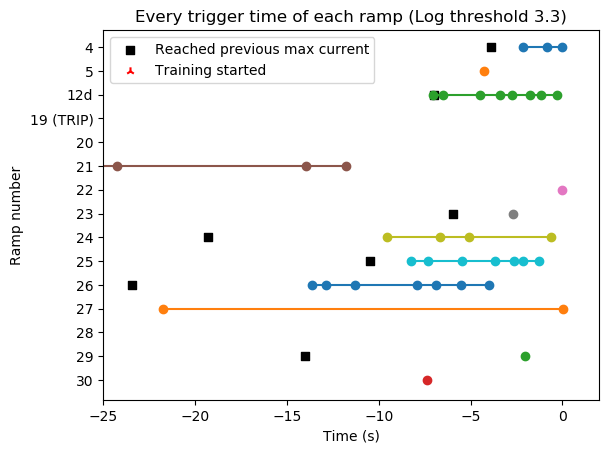

In [6]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

#Dictionary to store triggered time
trigger_time = {
    '4': [-2.1325998, -0.8125, -0.006],
    '5': [-4.2511],
    '12d':[-7.0541997, -6.5119996, -4.4707, -3.3790998, -2.731, -1.7816, -1.1640999, -0.3037], 
    '19 (TRIP)':[-100.91249, -99.53959, -98.41249, -95.22369, -94.704185, -91.80379, -91.193886], 
    '20':[-144.02179, -143.47359, -142.9188, -141.91309, -141.23909, -140.48679, -137.92479, -136.77028, -136.0718, -134.94579, -133.17009, -132.0474, -131.52489, -130.09099], 
    '21':[-39.2193, -36.6991, -33.379498, -30.5548, -24.255999, -13.9534, -11.759], 
    '22':[-0.0014], 
    '23':[-2.7054], 
    '24':[-9.5574, -6.6685, -5.0804, -0.6089], 
    '25':[-8.2364, -7.3210998, -5.4825, -3.6747, -2.6526, -2.1334, -1.2574999], 
    '26':[-13.608, -12.8804, -11.3139, -7.9374, -6.9013, -5.5281, -3.9722], 
    '27':[-21.7299, 15e-3], 
    '28':None, 
    '29':[-2.0335], 
    '30':[-7.3820996]}

#Reached previous quench's maximum current when?
reached_max = {
    '4': [-3.9],
    '5': None,
    '12d':[-7], 
    '19 (TRIP)': None, 
    '20':[-142], 
    '21':[-31.1], 
    '22':[], 
    '23':[-5.95], 
    '24':[-19.3], 
    '25':[-10.5], 
    '26':[-23.45], 
    '27': None, 
    '28': None, 
    '29':[-14], 
    '30':[-33.2]}

started_training =  {
    '4': [-91.155],
    '5': [-87.895],
    '12d':[-96.99], 
    '19 (TRIP)': None, 
    '20':[-212], 
    '21':[-115.3], 
    '22':[-84.56], 
    '23':[-50], 
    '24':[-106.93], 
    '25':[-100.51], 
    '26':[-114.105], 
    '27': [-71.5], 
    '28': [-63.15], 
    '29':[-102.08], 
    '30':[-122.68]}

ramp_names = list(trigger_time.keys())
y_pos = np.arange(len(ramp_names))

first_label = True
first_label_1 = True

#Loop through each ramp to plot trigger time
for i in range(len(ramp_names)):
    
    #Plot the time reached max current time
    if reached_max[ramp_names[i]]:
        if first_label:
            plt.scatter(reached_max[ramp_names[i]], y_pos[i], marker = 's', color = 'black', label = 'Reached previous max current')
            first_label = False
        else:
            plt.scatter(reached_max[ramp_names[i]], y_pos[i], marker = 's', color = 'black')
            
    #Get the trigger time for that ramp
    trigger_ramp = trigger_time[ramp_names[i]] 
    if trigger_ramp:
        plt.plot(trigger_ramp, [y_pos[i]]*len(trigger_ramp), '-o')
        
    #Plot the time started training
    if started_training[ramp_names[i]]:
        if first_label_1:
            plt.scatter(started_training[ramp_names[i]], y_pos[i], marker = '2', color = 'red', label = 'Training started')
            first_label_1 = False
        else:
            plt.scatter(started_training[ramp_names[i]], y_pos[i], marker = '2', color = 'red')
    
    
#ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(ramp_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Ramp number')
ax.set_xlabel('Time (s)')
ax.set_title('Every trigger time of each ramp (Log threshold 3.3)')
plt.legend(loc = 'upper left')
plt.xlim([-25,2])

plt.show()